In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [9]:
image_path = '../output_images/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # reads it as BGR, so need to convert to RGB

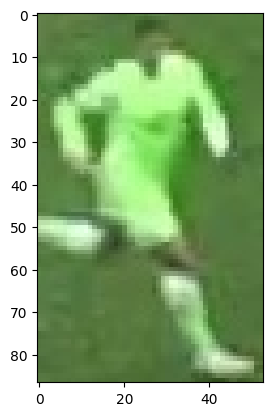

In [10]:
plt.imshow(image)
plt.show()

# use player jersey, top half

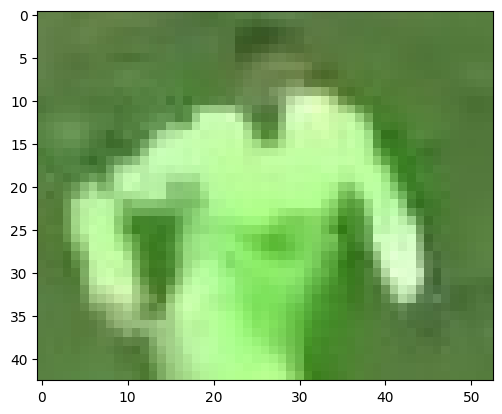

In [4]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)

# cluster the image into two clusters

### segment (remove) the background from the jersey color
### first, cluster the image into 2 colors: background and jersey color
### then, get the average of the t-shirt color

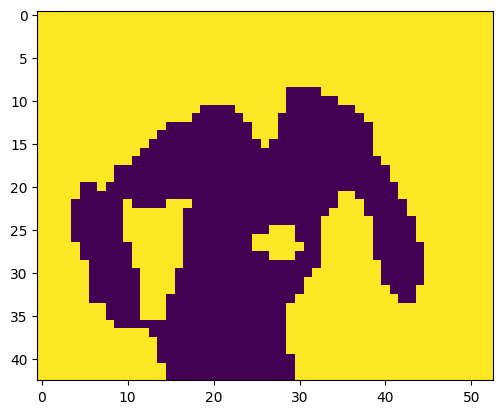

In [30]:
# Reshape the image into 2d array (for clustering format)
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels (for each pixel, does it belong to cluster 1 or 2)
labels = kmeans.labels_  # underscore on labels_ to avoid conflict with sys var

# reshape the labels into the original image shape
'''
shape attribute of Numpy array retruns a tuple representing the dimensions of the array. In this case 
image.shape[0] refers to the # OF ROWS in the image array
image.shape[1] refers to the # OF COLUMNS in the image array
'''
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display clustered image
plt.imshow(clustered_image)
plt.show()

strategy for differentiating background and jersey colors:
- usually background will be present on corners of frame
- get object detection class of each corner pixel


In [35]:
corner_clusters = [
    clustered_image[0,0],
    clustered_image[0,-1],
    clustered_image[-1,0],
    clustered_image[-1,-1]
]
# get number which appeared most in the corner sampling
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [36]:
# remember this is clustered into cluster 0 and cluster 1
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [ ]:
kmeans.cluster_centers_[player_cluster] = 